<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/Python/M3/C6_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Expresiones Regulares

Las expresiones regulares son expresiones comodín que definen patrones de caracteres a emparejar y extraer de una cadena de texto. Para entenderlo con un ejemplo, definamos “Python” como nuestra expresión regular y “Programa en Python” como nuestra cadena de texto. En este caso, nuestra cadena de texto contiene una instancia de nuestra expresión regular.

## Métodos 

El uso de las expresiones regulares en Python viene dado por el paquete re, que hay que importar a nuestro código. Algunos de los métodos proporcionados en este paquete son:

### .search()

* **re.search(patrón, cadena):** busca la primera ocurrencia de la expresión regular definida en patrón dentro del string cadena. El resultado se devuelve en un objeto Match en caso de que exista tal ocurrencia, o en un objeto None en caso contrario. Siguiendo con el ejemplo anterior:

In [ ]:
import re
re.search("Python", "Programa en Python")

<re.Match object; span=(12, 18), match='Python'>

###.findall()

* **re.findall(patrón, cadena):** devuelve una lista que contiene todas las ocurrencias de la expresión regular definida en patrón dentro del string cadena. Las ocurrencias se devuelven en el mismo orden en que se han encontrado.

In [ ]:
re.findall("Python", "Python es mi lenguaje de programación favorito, y gracias al diplomado que estoy tomando me estoy convirtiendo en todo un Pythonista.")

['Python', 'Python']

### .split()

* **re.split(separador, cadena):** divide la cadena tomando en cuenta las ocurrencias del separador. El resultado se devuelve en una lista.

In [ ]:
re.split("@","nombre.apellido@ejemplo.tld")

['nombre.apellido', 'ejemplo.tld']

## Carácteres para definir expresiones regulares

Hasta ahora hemos visto ejemplos muy simples del uso de las expresiones regulares. En este apartado vamos a ver los distintos caracteres o comodínes que podemos utilizar para formar patrones de búsqueda más complejos.

### Inicio y fin de línea: ^, $

Los símbolos de acento circunflejo (^) y dólar ($) indican que nuestro patrón de búsqueda debe contener respectivamente el inicio o fin de una línea en una cadena de texto. En el siguiente ejemplo, la expresión regular ‘^Python’ busca ocurrencias de la cadena Python al inicio de la línea, y por eso el método findall() devuelve sólo una ocurrencia a pesar de que la frase contenga dos veces la cadena ‘Python’.

In [ ]:
frase = "Python no sólo es un lenguaje de programación, Python es mi lenguaje de programacón favorito."
patron = '^Python'
re.findall(patron, frase)

['Python']

In [ ]:
frase = "Me gusta aprender Python y programar en Python"
patron = 'Python$'
re.findall(patron, frase)

['Python']

### Coincidencia de caracteres: ., \s,\S

Los símbolos ., \s y \S indican respectivamente cualquier carácter, espacio en blanco y cualquier carácter a excepción del espacio en blanco. En el siguiente ejemplo, ‘^.ython’ busca al principio de la línea (^) cualquier carácter (.) seguido por la cadena ‘ython’. Es decir, palabras como Aython, Bython, Cython, etc. a principio de línea se interpretan como una coincidencia. Sin embargo, la expresión regular ‘\s.ython’ empareja en la frase de ejemplo con ‘ Nython’ y ‘ Python’, ya que esta expresión regular busca un espacio en blanco al principio de la ocurrencia.

In [ ]:
frase = "Cython no es ningún lenguaje de programación y Nython tampoco pero Python sí"
patron = '^.ython'
palabras = re.findall(patron, frase)

In [ ]:
frase = "Cython no es ningún lenguaje de programación y Nython tampoco pero Python sí"
patron = '\\s.ython'
palabras = re.findall(patron, frase)

### Caracteres de repetición: *, +, ?

Estos tres caracteres tienen el siguiente significado:

* "*" : indica la repetición de un carácter cero o más veces.
* "+" : indica la repetición de un carácter una o más veces.
* "?" : Es el carácter reluctant o cuantificador reacio. Añadido a cualquiera de los anteriores se contará con la ocurrencia más corta posible.

El siguiente ejemplo ilustra el uso del cuantificador reacio. El primer patrón: ‘.+n’, busca cualquier repetición de caracteres que termine en ‘n’. Como la última palabra de la frase termina en ‘n’, el resultado de la búsqueda retorna la frase entera. Sin embargo, al añadir el cuantificador reacio al patrón: ‘.+?n’ el resultado de la búsqueda resulta más restrictiva ya que ésta contiene todas las secuencias de caracteres terminadas en ‘n’.

In [ ]:
frase = "Ramón y Román programan en Python"
patron = '.+n'
re.findall(patron, frase)

['Ramón y Román programan en Python']

In [ ]:
frase = "Ramón y Román programan en Python"
patron = '.+?n'
re.findall(patron, frase)

['Ramón', ' y Román', ' programan', ' en', ' Python']

### Conjunto de caracteres: [], [^]

Encerrando un conjunto de caracteres entre corchetes ([]) indica cualquiera de los caracteres especificados. Así, el patrón [abc] coincidiría con las secuencias ‘a’, ‘b’ o ‘c’. El siguiente ejemplo ilustra el uso de los corchetes. En él podemos ver que patrón ‘[CN]ython’ no encuentra coincidencia con la secuencia ‘Python’ de la frase, ya que ‘P’ no está dentro de los corchetes.

In [ ]:
frase = "Cython no es ningún lenguaje de programación y Nython tampoco pero Python sí"
patron = '[CN]ython'
re.findall(patron, frase)

['Cython', 'Nython']

El acento circunflejo (^) al principio de la secuencia entre corchetes se utiliza para indicar negación. Es decir la no coincidencia con los caracteres especificados. Un ejemplo de uso puede ser la separación de las palabras de una frase excluyendo sus signos de puntuación.

In [ ]:
frase = "¡Esto es una frase! Además contiene signos de puntuación. ¿Los eliminamos?"
patron = '[^¡!.¿? ]+'
re.findall(patron, frase)

['Esto',
 'es',
 'una',
 'frase',
 'Además',
 'contiene',
 'signos',
 'de',
 'puntuación',
 'Los',
 'eliminamos']

### Rangos de caracteres: [a-z]

Dentro de los conjuntos de caracteres también podemos especificar rangos añadiendo un guión a la secuencia. Algunos ejemplos de uso son los siguientes:

* [a-z]+ : indica una secuencia de letras minúsculas.
* [A-Z]+ : se usa para encontrar secuencias de letras mayúsculas.
* [a-zA-Z]+ : es para secuencias de letras mayúsculas o minúsculas.
* [A-Z][a-z]+ : secuencias de una letra mayúscula seguida de una o más letras mayúsculas.
* [0-9]+ : para secuencias de números de uno o más dígitos.

In [ ]:
frase = "Tengo 2 hijos que tienen 15 y 11 años"
patron = '[0-9]+'
re.findall(patron, frase)

['2', '15', '11']

### Inicio y fin de la extracción: ()

Los paréntesis ( ) no forman parte del patrón a comprobar, pero indican respectivamente dónde empieza y termina la extracción del texto. Un caso de uso es la extracción de dominios en direcciones de correo electrónico. Esta operación la podemos realizar mediante el patrón: ‘@([^ ]*)’ En este caso sabemos que el dominio viene después de un símbolo de arroba (@) que indicamos en nuestra expresión regular, seguido de una condición cerrada entre paréntesis ya que no queremos que el resultado contenga arrobas.

In [ ]:
frase = "Tengo dos correos electrónicos que son nombre.apellido@dominio.tld y nombre@dominio.com"
patron = '@([^ ]*)'
re.findall(patron, frase)

['dominio.tld', 'dominio.com']

# Natural Language Processing

In [1]:
!rm -rf Python
!git clone https://github.com/pikey-msc/Python.git

Cloning into 'Python'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 218 (delta 75), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (218/218), 13.00 MiB | 6.42 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
pip install -U scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"\t" significa separado por tabs

In [5]:
df = pd.read_csv('Python/M3/S6/smsspam.tsv', sep = '\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


Contamos los nulos de cada columna

In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
len(df)

5572

Vemos cuántas categorías tengo en la variable

In [10]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df.label.nunique()

2

Identificamos que nuestra variable respuesta (target) es binaria (1 = spam, 0 = ham)

In [12]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [13]:
df.label.value_counts(normalize=True)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

## Creación del modelo
Intentemos hacer un modelo de ML para predecir si un mail es spam o no basándonos sólo en las variables length y punct

In [14]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

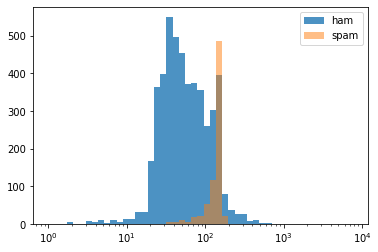

In [16]:
%matplotlib inline
plt.xscale('log')
bins = 1.2**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins = bins, alpha = 0.8)
plt.hist(df[df['label']=='spam']['length'], bins = bins, alpha = 0.5)
plt.legend(('ham', 'spam'))
plt.show()

Notemos que probablemente 'length' no baste para separar bien a los correos spam de los buenos.

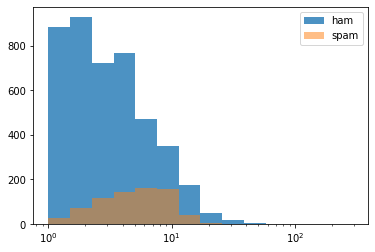

In [17]:
%matplotlib inline
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins = bins, alpha = 0.8)
plt.hist(df[df['label']=='spam']['punct'], bins = bins, alpha = 0.5)
plt.legend(('ham', 'spam'))
plt.show()

Al igual que el paso anterior observamos que 'punct' seguramente no separe bien los correos spam de los buenos ('ham').

Usaremos X para las variables predictoras (predictors, features, o xplanatory variables) e identificaremos a y como nuestra variable target (o label), es decir, nuestra variable respuesta.

In [18]:
X = df[['length', 'punct']]
y = df['label']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(3733, 2)
(1839, 2)


Las predictoras como input para evaluar el modelo

In [20]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
4944,95,4
3313,54,2
3652,44,4
14,35,2


## Naive Bayes Text Classification

Un clasificador probabilístico que asume independencia condicional es [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

Dos eventos A y B son independientes si P(A|B) = P(A)
Si P(A|C) = P(A|B,C) --> A y B SON CONDICIONALMENTE INDEPENDIENTES DADO C

Una vez que conocemos C, el conocer B no me dice nada nuevo / no aporta info nueva acerca de A
en términos probabilísticos.

#### Modelo probabilístico de Clasificación

En un modelo probabilístico de clasificación queremos estimar el valor de $P(c|x)$, la probabilidad de una muestra $x$ que sea de una clase $c$. Naive Bayes usa un clasificador que usa la regla de Bayes para clasificar muestras. Naive Bayes es *ingenuo* porque asume  fuerte independencia entre todas las características de la muestras


#### Regla de Bayes:

$P(c|x) = \frac{P(x|c)P(c)}{P(x)}$

#### Clasificación de texto usando el clasificador *ingenuo* de Naive Bayes

Considerese la tarea de clasificar documentos de texto en que tengan sentimientos positivos o negativos. Diseñaremos el clasificador de Naive Bayes como sigue:

Las muestras son documentos de texto, y las características son palabras que conforman estos documentos.

- Cada documento $d$ es una sucesión de palabras, $d = w_1w_2...w_n$, donde $w_i$ son los tokens del documento y $n$ es el número total de tokens en el documento $d$.

- El conjunto de datos entrenado consiste en muchos documentos, The training dataset consists of many document, y pares ${d_i, s_i}$

- Cada documento $d_i$ está asociado con un sentimiento $s_i \in \{0,1\}$, $0$ siendo sentimientos negativos y  $1$ sentimientos positivos.

Usando la **Regla de Bayes** tenemos 

$p(s|d) = \frac{p(d|s)p(s)}{p(d|s)p(s) + p(d|\bar{s})p(\bar{s})}$

Y dada la **suposición de independencia** de las características 

$p(d|s) = p(w_1,w_2,..., w_n|s) = p(w_1|s)p(w_2|s)...p(w_n|s)$

También en el conjunto de datos de IMDb que consideramos se tienen igual número de positivos y negativos conjuntos de datos.

Tenemos $p(s) = 0.5$ y $p(\bar{s})=0.5$.

Esto simplifica nuestro formulación para
$p(s|d)$

$ p(s|d) = \frac{p(d|s)}{p(d|s) + p(d|\bar{s})} $

Si asignamos un valor de referencia de
$p_T(s|d) = 0.5$ para decidir la etiqueta final, el modelo se simplifica a
$y=
    \begin{cases}
      1, & \text{if } p(d|s=1) \geq p(d|s=0)\\
      0, & \text{otherwise}
    \end{cases}$
#### Una medida numérica para la estabilidad

$p(w_i)$ será muy pequeña en magnitud, y entonces tomamos un producto de números muy pequeños para calcular $p(d|s)$. Entonces, para la estabilidad numérica, convertiremos las probabilidades a log probabilidades

$\log p(d|s) = \log p(w_1,w_2,..., w_n|s) = \log p(w_1|s) + \log p(w_2|s) + ...+ \log p(w_n|s)$

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1583   10]
 [ 246    0]]


In [ ]:
dfcm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'],
                   columns = ['ham', 'spam'])
dfcm

,ham,spam
ham,1583,10
spam,246,0


In [ ]:
y_test.value_counts()

ham     1593
spam     246
Name: label, dtype: int64

In [ ]:
rec = 0/246
acc = 1583 / (1593+246)
print(rec, acc)

0.0 0.8607939097335509


In [ ]:
print(metrics.accuracy_score(y_test, predictions))

0.8607939097335509


Esta medida no nos sirve (casi) de nada, porque la distribución en nuestro data set es justamente 87% de ham (0's o casos negativos) y 13% de spam (1's, o casos positivos)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



NO es , en general, mejor que si hubièramos definido una regla donde el modelo clasifique a todos como "ham" ya que 86.5% de los correos son "buenos" y no estamos aprovechando la información contenida en el TEXTO del correo.

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Feature Extraction:

Idea : transformar el texto a una estructura de datos que nos permita trabajar con los modelos de ML

Imaginemos que sólo tenemos estos 2 documentos (y que estos definen un vocabulario), y queremos construir un arreglo con todas las palabras que lo componen

Posteriormente, caracterizaremos a cada documento mediante un vector

In [ ]:
# 1.txt:

# This is a story about cats
# our feline pets
# Cats are furry animals

In [ ]:
vocab = {}
i=1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [ ]:
with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


In [ ]:
vocab['cats']

6

Ahora: transformar la informaciòn de forma tal que cada columna sea una palabra de nuestro vocabulario, y el valor sea la frecuencia

In [ ]:
#iniciamos los vectores en cero
vec1 = ['1.txt']+[0]*len(vocab)
vec2 = ['2.txt']+[0]*len(vocab)

Mapeamos las frecuencias de cada palabra en vec1 y vec2 (porque tenemos 2 documentos)

In [ ]:
# Vamos a contar el número de veces que aparece cada palabra en el texto 1

with open('1.txt') as f:
    x= f.read().lower().split() # aquí estamos "tokenizando" i.e. dividiendo el doc en palabras
    
for word in x:
    vec1[vocab[word]]+=1

vec1

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
with open('2.txt') as f:
    x= f.read().lower().split() # aquí estamos "tokenizando" i.e. dividiendo el doc en palabras
    
for word in x:
    vec2[vocab[word]]+=1

In [ ]:
print(f'{vec1}\n{vec2}')

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


### "Bag of words".
El enfoque anterior se conoce como "Bag of words"
1. Podemos caracterizar un documento mediante el número de veces que aparece una palabra en él
2. Para hacer comparables documentos de diferente tamaño, podemos usar frecuencias relativas (porcentaje que cada palabra representa del total)
3. Pero hay palabras puede aparecer en la mayoría de documentos.
4. Para solucionar lo anterior > enfoque *term frequency inverse document frequency* o [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

### Idea general tf-idf
### 1. Term frequency (Tf) : dar MÁS peso a palabras que aparecen más veces en un texto o documento

### 2. Inverse document frequency (idf) : se da más peso según las veces que la palabra aparece en el corpus Como es INVERSE document frequency, se DA MÁS PESO a palabra "raras" (que aparecen poco), y menos peso a palabras comunes (que aparecen mucho)

### 3. Por tanto, en lugar de tener conteos absolutos o relativos en nuestra matriz de predictoras, tendremos la tf-idf. 

## Otros puntos importantes
### En procesamiento de texto, a menudo se eliminan las "Stop Words" - palabras que aparecen mucho y no son informativas, como preposiciones, conjunciones y artículos.
### A menudo también se lleva a cabo el "stemming" -llevar una palabra a su forma 'raíz'.i.e. casas -> casa y otras acciones un poco más complejas para caracterizar una palabra y tener más información de ella.

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Aplicando vectorización tf-idf

In [ ]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape  #--> term document matrix or document term matrix

(3733, 7082)

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])
text_clf.fit(X_train, y_train) #pasando los datos de entrenamiento por el pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
pred = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, pred))

[[1593    0]
 [  70  176]]


In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839



In [ ]:
#utilizando una máquina de soporte vectorial:
from sklearn.svm import LinearSVC

In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
pred = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, pred), '\n')
print(metrics.classification_report(y_test, pred))

[[1586    7]
 [  12  234]] 

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



# Análisis de sentimientos

Es el proceso de determinar el tono emocional detrás de una serie de palabras. La herramienta de análisis de sentimiento es una técnica automatizada para extraer información significativa de los clientes, relacionada con sus actitudes, emociones y opiniones.  

Cargamos el dataframe

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Apoyo/ITAM/Tema_6_lenguaje/Reviews.csv", encoding='unicode_escape')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Podemos observar que el dataframe contiene productos, usuarios e información de la reseña.

Los datos que más vamos a utilizar para el análisis será “Summary”, “Text” y “Score”.

* Text – Es la variable que contiene la reseña completa.
* Summary – Es el resumen de la reseña.
* Score – Es la calificación del producto provista por el cliente.

## Análisis de datos

Ahora, lo que haremos será mirar la variable “Score” para revisar si la mayoría de las calificaciones son positivas o negativas.

Para realizar esto utilizaremos la librería Plotly, que tendrás que tenerla instalada previamente

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

def histogram(df,col,bins,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='histogram',x=col,bins=bins,title=title,asFigure=True,theme="white",layout=layout,color="#003e6c")
    fig.update_traces(opacity=0.90)
    return fig,

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
configure_plotly_browser_state()
histogram(df, "Score", 5, "Score")

(Figure({
     'data': [{'histfunc': 'count',
               'histnorm': '',
               'marker': {'color': 'rgba(0, 62, 108, 1.0)', 'line': {'color': '#4D5663', 'width': 1.3}},
               'name': 'Score',
               'nbinsx': 5,
               'opacity': 0.9,
               'orientation': 'v',
               'type': 'histogram',
               'x': [5, 1, 4, ..., 5, 5, 5]}],
     'layout': {'barmode': 'overlay',
                'font': {'color': 'black', 'family': 'Courier New, monospace'},
                'template': '...',
                'title': {'font': {'color': '#004878', 'family': 'Courier New, monospace', 'size': 30}, 'text': 'Score'},
                'xaxis': {'title': {'font': {'color': '#002e4d', 'family': 'Courier New, monospace', 'size': 18}}}}
 }),)

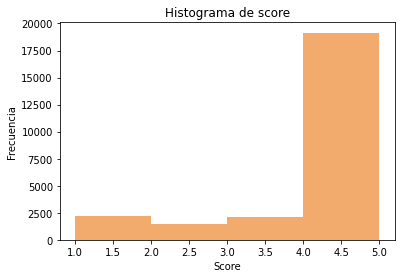

In [ ]:
import matplotlib.pyplot as plot

score = df['Score']

intervalos = [1,2,3,4,5]

plot.hist(x=score, bins=intervalos, color='#F2AB6D', rwidth=1)
plot.title('Histograma de score')
plot.xlabel('Score')
plot.ylabel('Frecuencia')

plot.show() 

Desde de acá podemos ver que la mayoría de las calificaciones de los clientes son positivas. Esto nos conlleva a pensar que la mayoría de las reseñas serán también positivas, las cuales analizaremos en breve.

Ahora crearemos la nube de palabras “wordclouds” más utilizadas en las reseñas empleando la librería “NLTK” y la librería “wordcloud”.

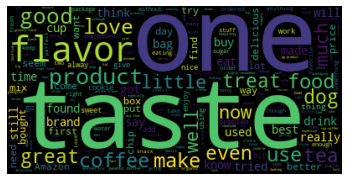

In [ ]:
#Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

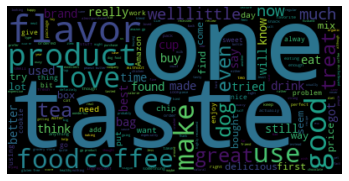

In [ ]:
#Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Se puede identificar que palabras populares son “Taste”, “Love”, “Product”, “Amazon”, “One”. Estas palabras son en su mayoría positiva, lo que también nos indica que la mayoría de las reseñas del conjunto de datos expresan un sentimiento positivo.

## Clasificación de tweets

Vamos clasificar las reseñas como “positivas” y “negativas”, de esta forma podemos usarla nuestros datos como entrenamiento para nuestro modelo de clasificación de sentimiento.

Reseñas positivas serán clasificadas como +1, y reseñas negativas serán clasificadas como -1.

Clasificaremos todas las reseñas con “Score”>3 como +1, “Score” > 3 serán negativas. Se eliminarán las reseñas con “Score”=3 por que son valores neutrales. Nuestro modelo solo clasificará reseñas como positivas o negativas.

In [ ]:
df = df[df['Score']!=3]
df['sentiment'] = df['Score'].apply(lambda rating: +1 if rating > 3 else 0)

Revisando nuevamente nuestro data frame, ahora podemos observar una nueva columna llamada “sentiment”.

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


Ahora que ya hemos clasificado nuestros tweets en positivos y negativos, vamos a construir una nube de palabras para ambos casos.

Primero, crearemos dos dataframes, uno para las reseñas positivas y otro para las reseñas negativas.

In [ ]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

Generamos la nube de palabras para Positivos

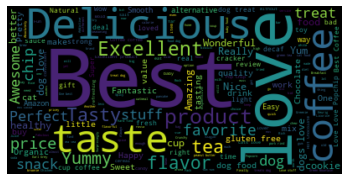

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good, great son removidos ya que fueron incluidos en los sentimientos negativos.

pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Generamos la nube de palabras para Negativos

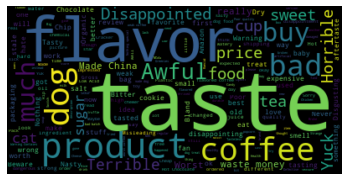

In [ ]:
neg = " ".join(str(review) for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

Tal como se muestra en las dos nubes generadas, la nube positiva refleja palabras como “love”, “best” y “delicious”, mientras que en la nube de sentimientos negativos las palabras que más aparecen son “dissapointed” y “horrible”.

Las palabras “good” y “great” inicialmente aparecían en la nube de sentimientos negativos, a pesar de ser palabras positivas. Esto se debe probablemente que estas palabras se usaron en un contexto negativo como, “not good”, “not great”. Por este motivo es que fueron removidas de la nube de palabras.

Finalmente podemos dar una mirada a la distribución de las reseñas a traves del dataset:

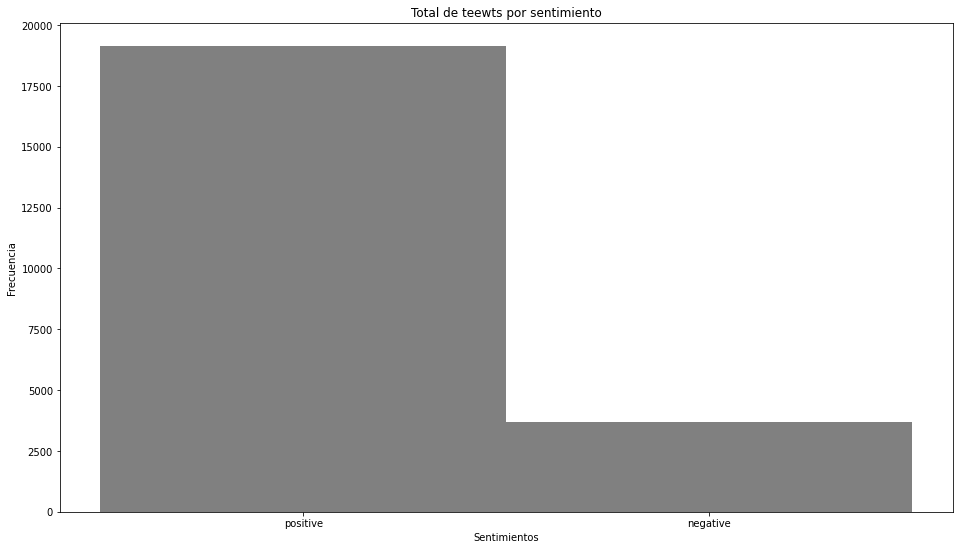

In [ ]:
df['sentimentt'] = df['sentiment'].replace({0 : 'negative', 1: 'positive'})

labels = list(df['sentimentt'].unique())
valores = list(df['sentimentt'].value_counts())
  
fig = plt.figure(figsize = (16, 9))
 
# creating the bar plot
plt.bar(labels, valores, color ='grey', width = 1)
 
plt.xlabel("Sentimientos")
plt.ylabel("Frecuencia")
plt.title("Total de teewts por sentimiento")
plt.show()

## Creación del modelo

Finalmente podemos construir el modelo de análisis de sentimiento.

Este modelo tomara las reseñas como entrada (input). Luego proporcionará una predicción si la reseña es positiva o negativa.

Esta tarea es una modelo de clasificación, por lo que entrenaremos nuestro modelo en una simple regresión logística.

### Limpieza de dato

Estaremos usando los datos de la columna “summary” para determinar las predicciones. Primero necesitamos remover todas las puntaciones de los datos.

In [ ]:
def remove_punctuation(text):
  final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"'))
  return final
  
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

Los nuevos datos solo deberían contar con dos columnas “Summary (reseña)” y “sentiment (target)”

In [ ]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,0
2,Delight says it all,1
3,Cough Medicine,0
4,Great taffy,1


Ahora solo resta dividir el dataframe para entrenamiento y para test. 80% de los datos serán empleados para entrenamiento y 20% para test.

In [ ]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

### Bolsa de palabras

Ahora, usaremos el “count vectorize” de la librería Scikit-learn.

Esto transformará el texto en nuestro dataframe en una bolsa modelo de palabras, la cual contendrá una matriz dispersa de numero enteros. Se contará e imprimirá el numero de ocurrencias de cada palabra.

Necesitaremos convertir el texto en un modelo de bolsa de palabras ya que el algoritmo de regresión logística no puede entender texto.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

### Regresión logística

Importamos el modelo de regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Dividimos las variables independientes de la variable target

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

Ajustamos del modelo

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

Generamos las predicciones

In [ ]:
predictions = lr.predict(X_test)

### Test

Ahora resta realizar las pruebas para determinar la precisión del modelo.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 441,  100],
       [ 362, 3892]])

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       541
           1       0.97      0.91      0.94      4254

    accuracy                           0.90      4795
   macro avg       0.76      0.87      0.80      4795
weighted avg       0.93      0.90      0.91      4795



La precisión general del modelo en los datos de prueba es del 90%, lo cual es bastente bueno considerando que no se hicieron mayores trabajos de procesado.